# Analysing customer spending

This section seeks to obtain an overvall understanding of the customer spendings and answer the following questions:

  - What can we tell about the transactions?
  - How are customers reacting to the offers?
  - What data cleaning steps would be necessary?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.eda import *
plt.style.use('ggplot')

In [2]:
# Load data
profile = pd.read_csv('./data/final/profile.csv')
transcript = pd.read_csv('./data/processed/transcript.csv')

In [3]:
transcript.head(20)

amount  reward                            person           event  time  \
0      NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1      NaN     NaN  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2      NaN     NaN  e2127556f4f64592b11af22de27a7932  offer received     0   
3      NaN     NaN  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4      NaN     NaN  68617ca6246f4fbc85e91a2a49552598  offer received     0   
5      NaN     NaN  389bc3fa690240e798340f5a15918d5c  offer received     0   
6      NaN     NaN  c4863c7985cf408faee930f111475da3  offer received     0   
7      NaN     NaN  2eeac8d8feae4a8cad5a6af0499a211d  offer received     0   
8      NaN     NaN  aa4862eba776480b8bb9c68455b8c2e1  offer received     0   
9      NaN     NaN  31dda685af34476cad5bc968bdb01c53  offer received     0   
10     NaN     NaN  744d603ef08c4f33af5a61c8c7628d1c  offer received     0   
11     NaN     NaN  3d02345581554e81b7b289ab5e288078  offer received     0   
12     NaN     NaN  4b0da7e80e5945209a1fdddfe813dbe0  offer received     0   
13     NaN     NaN  c27e0d6ab72c455a8bb66d980963de60  offer received     0   
14     NaN     NaN  d53717f5400c4e84affdaeda9dd926b3  offer received     0   
15     NaN     NaN  f806632c011441378d4646567f357a21  offer received     0   
16     NaN     NaN  d058f73bf8674a26a95227db098147b1  offer received     0   
17     NaN     NaN  65aba5c617294649aeb624da249e1ee5  offer received     0   
18     NaN     NaN  ebe7ef46ea6f4963a7dd49f501b26779  offer received     0   
19     NaN     NaN  1e9420836d554513ab90eba98552d0a9  offer received     0   

                               offer  
0   9b98b8c7a33c4b65b9aebfe6a799e6d9  
1   0b1e1539f2cc45b7b9fa7c272da2e1d7  
2   2906b810c7d4411798c6938adc9daaa5  
3   fafdcd668e3743c1bb461111dcafc2a4  
4   4d5c57ea9a6940dd891ad53e9dbe8da0  
5   f19421c1d4aa40978ebb69ca19b0e20d  
6   2298d6c36e964ae4a3e7e9706d1fb8c2  
7   3f207df678b143eea3cee63160fa8bed  
8   0b1e1539f2cc45b7b9fa7c272da2e1d7  
9   0b1e1539f2cc45b7b9fa7c272da2e1d7  
10  0b1e1539f2cc45b7b9fa7c272da2e1d7  
11  0b1e1539f2cc45b7b9fa7c272da2e1d7  
12  ae264e3637204a6fb9bb56bc8210ddfd  
13  3f207df678b143eea3cee63160fa8bed  
14  0b1e1539f2cc45b7b9fa7c272da2e1d7  
15  fafdcd668e3743c1bb461111dcafc2a4  
16  0b1e1539f2cc45b7b9fa7c272da2e1d7  
17  2906b810c7d4411798c6938adc9daaa5  
18  9b98b8c7a33c4b65b9aebfe6a799e6d9  
19  ae264e3637204a6fb9bb56bc8210ddfd

In [4]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   amount  138953 non-null  float64
 1   reward  33579 non-null   float64
 2   person  306534 non-null  object 
 3   event   306534 non-null  object 
 4   time    306534 non-null  int64  
 5   offer   167581 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ MB


In [5]:
transcript.describe()

amount        reward           time
count  138953.000000  33579.000000  306534.000000
mean       12.777356      4.904137     366.382940
std        30.250529      2.886647     200.326314
min         0.050000      2.000000       0.000000
25%         2.780000      2.000000     186.000000
50%         8.890000      5.000000     408.000000
75%        18.070000      5.000000     528.000000
max      1062.280000     10.000000     714.000000

It appears the average spending of each transaction is \$30, and average reward is \$3. Therefore, the net amount is approximately \$27.

Next, let's see the distribution of each event type

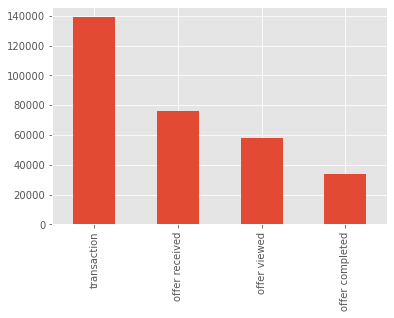

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64


In [6]:
get_category_distribution(transcript['event'])

The offer completion rate is 33579 / 76277 ~ 44%, offer view rate is 57725/76277 ~ 75%.

### Order value distribution

First, let's have an overview on how much is spent on orders.

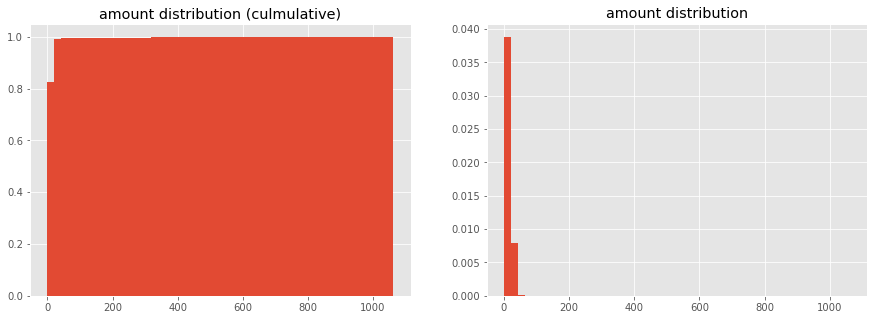

In [7]:
plot_feature_distribution(transcript['amount'], bins=50)

Analysing the value distribution of the orders shows that most of the orders were below $50, and there were some orders at $1000. It is not plausible to tell if these orders are outliers or not, because there is a possibility that some customers consistently spend more than a few hundred dollars on drinks.

Therefore, let's analyse on average, how much do customers spend on an order by analysing the distribution of the median order value per person.

In [8]:
# Compute the median order value per person
median_order_value = transcript[~transcript['amount'].isnull()].groupby('person')['amount'].median()

# Compute the total number of order per person
transaction_count_by_person = transcript[transcript['event'] == 'transaction'].groupby('person')['amount'].count()

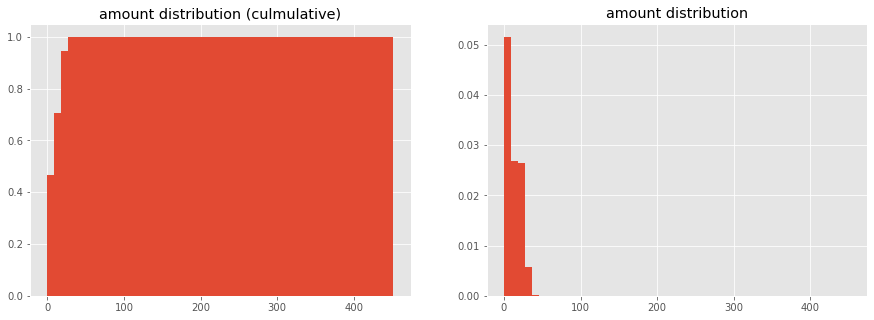

In [9]:
plot_feature_distribution(median_order_value, bins=50)

The plot suggests that there could be a small number of "big spenders" whose orders average higher than $40 and takes up approximately 1% of the customers. Let's analyse them separately.

Not "big spenders"


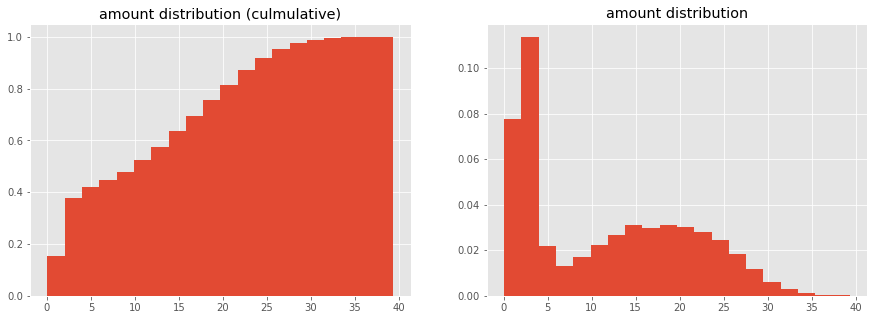

Big spenders


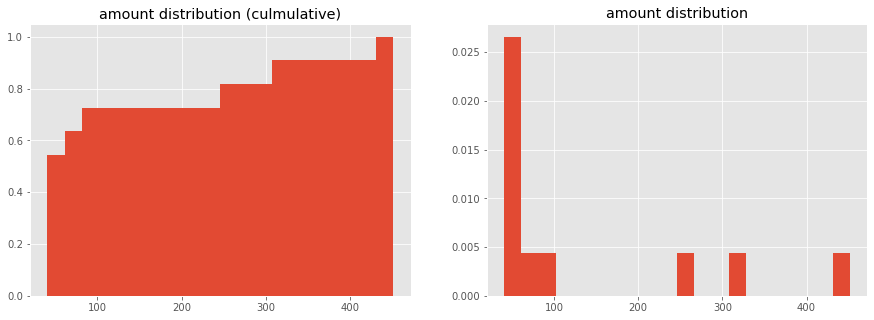

In [10]:
print('Not "big spenders"')
plot_feature_distribution(median_order_value[median_order_value < 40])

print('Big spenders')
plot_feature_distribution(median_order_value[median_order_value >= 40])

The plot also suggests that most of the customers spend ~ \$5 on an order. Most of big spenders spend about \$50 - \$60 on an order.

### Order value vs. income

Since we want to predict how a customer would spend with or without an order, it's important to see if it is actually predictable by looking at factors that might drive spendings. In this case, income could be a candidate. Let's verify the hypothesis.

In [11]:
median_order_value

person
0009655768c64bdeb2e877511632db8f    13.835
00116118485d4dfda04fdbaba9a87b5c     0.700
0011e0d4e6b944f998e987f904e8c1e5    13.490
0020c2b971eb4e9188eac86d93036a77    24.350
0020ccbbb6d84e358d3414a3ff76cffd    12.755
                                     ...  
fff3ba4757bd42088c044ca26d73817a    20.980
fff7576017104bcc8677a8d63322b5e1     5.030
fff8957ea8b240a6b5e634b6ee8eafcf     0.890
fffad4f4828548d1b5583907f2e9906b     7.515
ffff82501cea40309d5fdd7edcca4a07    15.570
Name: amount, Length: 16578, dtype: float64

In [12]:
# Merge income and spending
income_spending = pd.merge(
    median_order_value.reset_index(),
    profile[['person', 'income']],
    how='inner',
    on='person'
)

# Show
income_spending.head(10)

person  amount   income
0  0009655768c64bdeb2e877511632db8f  13.835  72000.0
1  0011e0d4e6b944f998e987f904e8c1e5  13.490  57000.0
2  0020c2b971eb4e9188eac86d93036a77  24.350  90000.0
3  0020ccbbb6d84e358d3414a3ff76cffd  12.755  60000.0
4  003d66b6608740288d6cc97a6903f4f0   2.270  73000.0
5  00426fe3ffde4c6b9cb9ad6d077a13ea   3.080  65000.0
6  004b041fbfe44859945daa2c7f79ee64  22.705  74000.0
7  004c5799adbf42868b9cff0396190900  26.950  99000.0
8  005500a7188546ff8a767329a2f7c76a   4.855  47000.0
9  0056df74b63b4298809f0b375a304cf4  29.030  91000.0

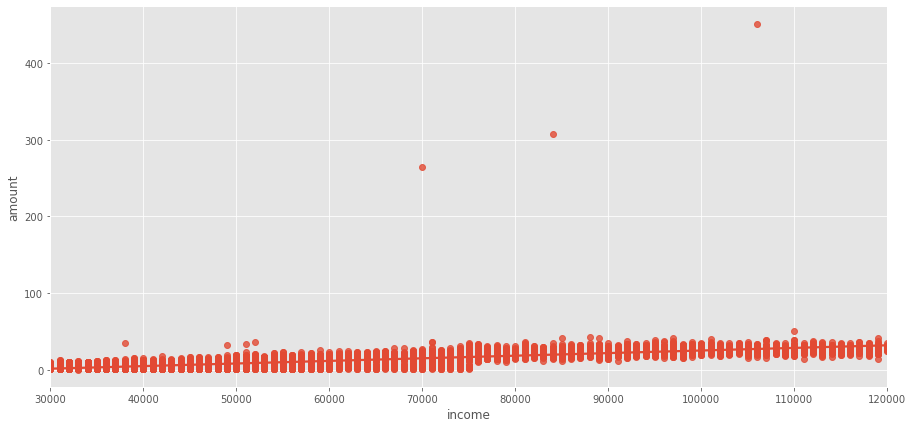

In [13]:
reg_plot('income', 'amount', data=income_spending)

Looks like we have 3 customers who averaged more than \$250 an order. They will be considered as outliers and thus removed from the analysis.

In [14]:
# Get customer id of outliers
to_remove = income_spending.loc[income_spending['amount'] > 200, 'person'].tolist()

# Store as a list for future use
with open('./data/customer_to_be_removed.txt', 'w') as f:
    for customer in to_remove:
        f.write(customer + '\n')

Now, let's remove them from the dataset and re-plot the income - order value plot to see if there's a trend.

In [15]:
income_spending = income_spending[~income_spending['person'].isin(to_remove)]

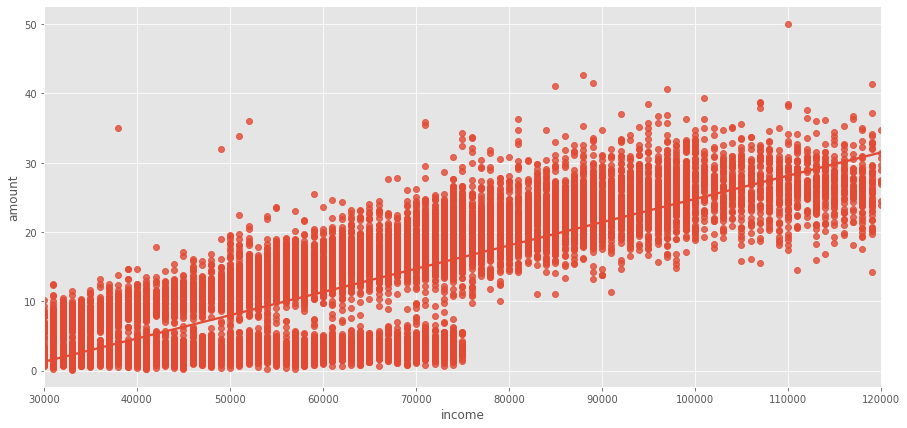

In [16]:
reg_plot('income', 'amount', data=income_spending)

The plot suggests that on average, the higher the income, the higher the order value. However, the bottom-left corner suggests that quite a few people only spend less than \$5 on an order regardless of their income. This means that income alone, although correlates well with average order spending, is not the sole factor determining order value. Therefore, analysing other factors is necessary.

In addition, this also shows that typically, orders are below \$50. Therefore, orders valued at thousands or hundreds dollars are considered outliers, thus removed from the dataset. However we won't remove these records at this stage, as it will corrupt the transcript. The removal will be done before the modelling phase.

### Median order value by gender

In [17]:
income_spending

person  amount   income
0      0009655768c64bdeb2e877511632db8f  13.835  72000.0
1      0011e0d4e6b944f998e987f904e8c1e5  13.490  57000.0
2      0020c2b971eb4e9188eac86d93036a77  24.350  90000.0
3      0020ccbbb6d84e358d3414a3ff76cffd  12.755  60000.0
4      003d66b6608740288d6cc97a6903f4f0   2.270  73000.0
...                                 ...     ...      ...
14486  fff3ba4757bd42088c044ca26d73817a  20.980  83000.0
14487  fff7576017104bcc8677a8d63322b5e1   5.030  73000.0
14488  fff8957ea8b240a6b5e634b6ee8eafcf   0.890  56000.0
14489  fffad4f4828548d1b5583907f2e9906b   7.515  34000.0
14490  ffff82501cea40309d5fdd7edcca4a07  15.570  62000.0

[14488 rows x 3 columns]

In [18]:
# Merge
income_spending_gender_age = pd.merge(
    left=income_spending,
    right=profile[['person', 'gender', 'age']],
    on='person',
    how='left'
)

income_spending_gender_age.head(10)

person  amount   income gender   age
0  0009655768c64bdeb2e877511632db8f  13.835  72000.0      M  33.0
1  0011e0d4e6b944f998e987f904e8c1e5  13.490  57000.0      O  40.0
2  0020c2b971eb4e9188eac86d93036a77  24.350  90000.0      F  59.0
3  0020ccbbb6d84e358d3414a3ff76cffd  12.755  60000.0      F  24.0
4  003d66b6608740288d6cc97a6903f4f0   2.270  73000.0      F  26.0
5  00426fe3ffde4c6b9cb9ad6d077a13ea   3.080  65000.0      F  19.0
6  004b041fbfe44859945daa2c7f79ee64  22.705  74000.0      F  55.0
7  004c5799adbf42868b9cff0396190900  26.950  99000.0      M  54.0
8  005500a7188546ff8a767329a2f7c76a   4.855  47000.0      M  56.0
9  0056df74b63b4298809f0b375a304cf4  29.030  91000.0      M  54.0

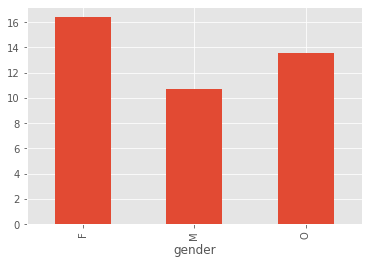

In [19]:
# Plot
income_spending_gender_age.groupby('gender')['amount'].mean().plot(kind='bar')
plt.show()

The plot suggests that on average, female spend the most on an order.

### Order value by age

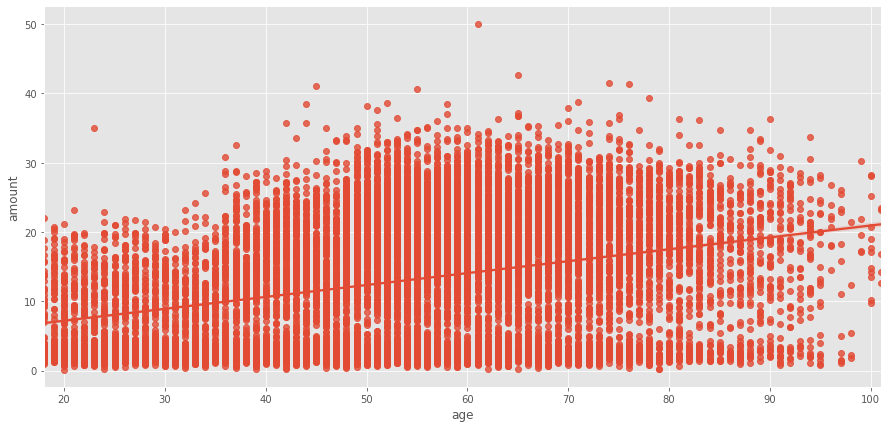

In [20]:
reg_plot('age', 'amount', data=income_spending_gender_age)

The plot suggests that on average, the more senior you are, the more you spend on an order. This is true because as you age, you have more income, thus more money to spend on drinks.

## Analysing a sample of customers

Let's pick out a few customers and analyse their spending pattern to understand more about the dataset.

In [21]:
# Load portfolio data
portfolio = pd.read_csv('./data/processed/portfolio.csv')

# Get offer details
transcript_offer_details = transcript.merge(
    portfolio[['id', 'offer_type']],
    left_on='offer',
    right_on='id',
    how='left'
).drop('id', axis=1)

def get_customer_spending_log(customer_idx):
    return transcript_offer_details[transcript_offer_details['person'] == profile['person'][customer_idx]]

In [22]:
get_customer_spending_log(0).head(100)

amount  reward                            person            event  \
20282    21.51     NaN  0610b486422d4921ae7d2bf64640c50b      transaction   
49501    32.28     NaN  0610b486422d4921ae7d2bf64640c50b      transaction   
150597     NaN     NaN  0610b486422d4921ae7d2bf64640c50b   offer received   
201571     NaN     NaN  0610b486422d4921ae7d2bf64640c50b   offer received   
227842   23.22     NaN  0610b486422d4921ae7d2bf64640c50b      transaction   
227843     NaN     5.0  0610b486422d4921ae7d2bf64640c50b  offer completed   

        time                             offer     offer_type  
20282     18                               NaN            NaN  
49501    144                               NaN            NaN  
150597   408  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
201571   504  3f207df678b143eea3cee63160fa8bed  informational  
227842   528                               NaN            NaN  
227843   528  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo

Looks like this customer received 2 offers, 1 informational and 1 promotional and ended up completing the offer. It's unclear whether the informational offer stimulated the spending or not at this stage.

Interestingly, when the customer completed an offer, the offer details was not logged in the same record when the transaction was completed (as can be seen in the last 2 rows). Therefore, we need to match the transaction with the offers.

In [23]:
get_customer_spending_log(1).head(100)

amount  reward                            person            event  \
0          NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef   offer received   
15561      NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   
47582    19.89     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
47583      NaN     5.0  78afa995795e4d85b5d9ceeca43f5fef  offer completed   
49502    17.78     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
53176      NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef   offer received   
85291      NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   
87134    19.67     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
92104    29.72     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
141566   23.93     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
150598     NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef   offer received   
163375     NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   
201572     NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef   offer received   
218393   21.72     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
218394     NaN    10.0  78afa995795e4d85b5d9ceeca43f5fef  offer completed   
218395     NaN     5.0  78afa995795e4d85b5d9ceeca43f5fef  offer completed   
230412   26.56     NaN  78afa995795e4d85b5d9ceeca43f5fef      transaction   
262138     NaN     NaN  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   

        time                             offer     offer_type  
0          0  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
15561      6  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
47582    132                               NaN            NaN  
47583    132  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
49502    144                               NaN            NaN  
53176    168  5a8bc65990b245e5a138643cd4eb9837  informational  
85291    216  5a8bc65990b245e5a138643cd4eb9837  informational  
87134    222                               NaN            NaN  
92104    240                               NaN            NaN  
141566   378                               NaN            NaN  
150598   408  ae264e3637204a6fb9bb56bc8210ddfd           bogo  
163375   408  ae264e3637204a6fb9bb56bc8210ddfd           bogo  
201572   504  f19421c1d4aa40978ebb69ca19b0e20d           bogo  
218393   510                               NaN            NaN  
218394   510  ae264e3637204a6fb9bb56bc8210ddfd           bogo  
218395   510  f19421c1d4aa40978ebb69ca19b0e20d           bogo  
230412   534                               NaN            NaN  
262138   582  f19421c1d4aa40978ebb69ca19b0e20d           bogo

This customer responds to every offer they received, whether it's informational or promotional and is also a very proactive buyer.

In [24]:
get_customer_spending_log(2).head(100)

amount  reward                            person            event  \
2          NaN     NaN  e2127556f4f64592b11af22de27a7932   offer received   
20283      NaN     NaN  e2127556f4f64592b11af22de27a7932     offer viewed   
102635   17.88     NaN  e2127556f4f64592b11af22de27a7932      transaction   
103834   21.43     NaN  e2127556f4f64592b11af22de27a7932      transaction   
110830     NaN     NaN  e2127556f4f64592b11af22de27a7932   offer received   
150600     NaN     NaN  e2127556f4f64592b11af22de27a7932   offer received   
171209     NaN     NaN  e2127556f4f64592b11af22de27a7932     offer viewed   
201574     NaN     NaN  e2127556f4f64592b11af22de27a7932   offer received   
225059     NaN     NaN  e2127556f4f64592b11af22de27a7932     offer viewed   
225060   18.42     NaN  e2127556f4f64592b11af22de27a7932      transaction   
225061     NaN     5.0  e2127556f4f64592b11af22de27a7932  offer completed   
225062     NaN     2.0  e2127556f4f64592b11af22de27a7932  offer completed   

        time                             offer     offer_type  
2          0  2906b810c7d4411798c6938adc9daaa5       discount  
20283     18  2906b810c7d4411798c6938adc9daaa5       discount  
102635   288                               NaN            NaN  
103834   294                               NaN            NaN  
110830   336  3f207df678b143eea3cee63160fa8bed  informational  
150600   408  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
171209   420  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
201574   504  fafdcd668e3743c1bb461111dcafc2a4       discount  
225059   522  fafdcd668e3743c1bb461111dcafc2a4       discount  
225060   522                               NaN            NaN  
225061   522  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo  
225062   522  fafdcd668e3743c1bb461111dcafc2a4       discount

This customer also reacts to offers except for one discount offer at the beginning.

In [25]:
get_customer_spending_log(3).head(100)

amount  reward                            person            event  \
5          NaN     NaN  389bc3fa690240e798340f5a15918d5c   offer received   
12650      NaN     NaN  389bc3fa690240e798340f5a15918d5c     offer viewed   
32625     9.54     NaN  389bc3fa690240e798340f5a15918d5c      transaction   
32626      NaN     5.0  389bc3fa690240e798340f5a15918d5c  offer completed   
53179      NaN     NaN  389bc3fa690240e798340f5a15918d5c   offer received   
77212      NaN     NaN  389bc3fa690240e798340f5a15918d5c     offer viewed   
110831     NaN     NaN  389bc3fa690240e798340f5a15918d5c   offer received   
132803     NaN     NaN  389bc3fa690240e798340f5a15918d5c     offer viewed   
150601     NaN     NaN  389bc3fa690240e798340f5a15918d5c   offer received   
179953     NaN     NaN  389bc3fa690240e798340f5a15918d5c     offer viewed   
200084   15.63     NaN  389bc3fa690240e798340f5a15918d5c      transaction   
200085     NaN     2.0  389bc3fa690240e798340f5a15918d5c  offer completed   
200086     NaN     5.0  389bc3fa690240e798340f5a15918d5c  offer completed   
201577     NaN     NaN  389bc3fa690240e798340f5a15918d5c   offer received   
214275     NaN     NaN  389bc3fa690240e798340f5a15918d5c     offer viewed   
245126     NaN     NaN  389bc3fa690240e798340f5a15918d5c   offer received   
265621     NaN     NaN  389bc3fa690240e798340f5a15918d5c     offer viewed   
271780   11.26     NaN  389bc3fa690240e798340f5a15918d5c      transaction   
271781     NaN     5.0  389bc3fa690240e798340f5a15918d5c  offer completed   
271782     NaN     2.0  389bc3fa690240e798340f5a15918d5c  offer completed   

        time                             offer offer_type  
5          0  f19421c1d4aa40978ebb69ca19b0e20d       bogo  
12650      0  f19421c1d4aa40978ebb69ca19b0e20d       bogo  
32625     60                               NaN        NaN  
32626     60  f19421c1d4aa40978ebb69ca19b0e20d       bogo  
53179    168  9b98b8c7a33c4b65b9aebfe6a799e6d9       bogo  
77212    192  9b98b8c7a33c4b65b9aebfe6a799e6d9       bogo  
110831   336  2906b810c7d4411798c6938adc9daaa5   discount  
132803   354  2906b810c7d4411798c6938adc9daaa5   discount  
150601   408  9b98b8c7a33c4b65b9aebfe6a799e6d9       bogo  
179953   438  9b98b8c7a33c4b65b9aebfe6a799e6d9       bogo  
200084   498                               NaN        NaN  
200085   498  2906b810c7d4411798c6938adc9daaa5   discount  
200086   498  9b98b8c7a33c4b65b9aebfe6a799e6d9       bogo  
201577   504  f19421c1d4aa40978ebb69ca19b0e20d       bogo  
214275   504  f19421c1d4aa40978ebb69ca19b0e20d       bogo  
245126   576  fafdcd668e3743c1bb461111dcafc2a4   discount  
265621   588  fafdcd668e3743c1bb461111dcafc2a4   discount  
271780   600                               NaN        NaN  
271781   600  f19421c1d4aa40978ebb69ca19b0e20d       bogo  
271782   600  fafdcd668e3743c1bb461111dcafc2a4   discount

Interestingly, this customer completed 2 offers at the same time. This has now complicated the analysis a little bit, because now we don't know if the effect of offers on customers are additive which made the customer wanted to spend more, or they're just interested in one and completed the other just by chance.

For the sake of simplicity, I'll assume that the offer effect is not additive.



In [26]:
get_customer_spending_log(4).head(100)

amount  reward                            person            event  \
7          NaN     NaN  2eeac8d8feae4a8cad5a6af0499a211d   offer received   
53182      NaN     NaN  2eeac8d8feae4a8cad5a6af0499a211d   offer received   
65844      NaN     NaN  2eeac8d8feae4a8cad5a6af0499a211d     offer viewed   
85293     2.32     NaN  2eeac8d8feae4a8cad5a6af0499a211d      transaction   
110835     NaN     NaN  2eeac8d8feae4a8cad5a6af0499a211d   offer received   
130152     NaN     NaN  2eeac8d8feae4a8cad5a6af0499a211d     offer viewed   
141567    5.29     NaN  2eeac8d8feae4a8cad5a6af0499a211d      transaction   
187136    7.14     NaN  2eeac8d8feae4a8cad5a6af0499a211d      transaction   
187137     NaN     2.0  2eeac8d8feae4a8cad5a6af0499a211d  offer completed   
243231    0.87     NaN  2eeac8d8feae4a8cad5a6af0499a211d      transaction   

        time                             offer     offer_type  
7          0  3f207df678b143eea3cee63160fa8bed  informational  
53182    168  2298d6c36e964ae4a3e7e9706d1fb8c2       discount  
65844    168  2298d6c36e964ae4a3e7e9706d1fb8c2       discount  
85293    216                               NaN            NaN  
110835   336  fafdcd668e3743c1bb461111dcafc2a4       discount  
130152   348  fafdcd668e3743c1bb461111dcafc2a4       discount  
141567   378                               NaN            NaN  
187136   456                               NaN            NaN  
187137   456  fafdcd668e3743c1bb461111dcafc2a4       discount  
243231   570                               NaN            NaN

Now that we're done with this dataset, let's export it to csv.

In [27]:
transcript.to_csv('./data/final/transcript.csv', index=False)

print('Done')

Done
